In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
df = pd.read_csv("../data/processed/stockout_risk_output.csv")
print(df.shape)
df.head()

(10000, 9)


,sku_id,product_name,category,stock_level,avg_daily_demand,lead_time_days,demand_during_lead_time,safety_stock_buffer,stockout_risk_flag
0,SKU-00874,Boy Television,Electronics,64,45.433333,29,1318.0,-1253.566667,HIGH RISK
1,SKU-00314,Population Very,Toys,4,42.716667,29,1239.0,-1234.783333,HIGH RISK
2,SKU-03317,Mother Movie,Home & Garden,70,44.900000,29,1302.0,-1232.100000,HIGH RISK
3,SKU-09355,Yourself Shoulder,Automotive,36,44.850000,28,1256.0,-1219.800000,HIGH RISK
4,SKU-08259,Per Husband,Health & Beauty,26,44.133333,28,1236.0,-1209.733333,HIGH RISK


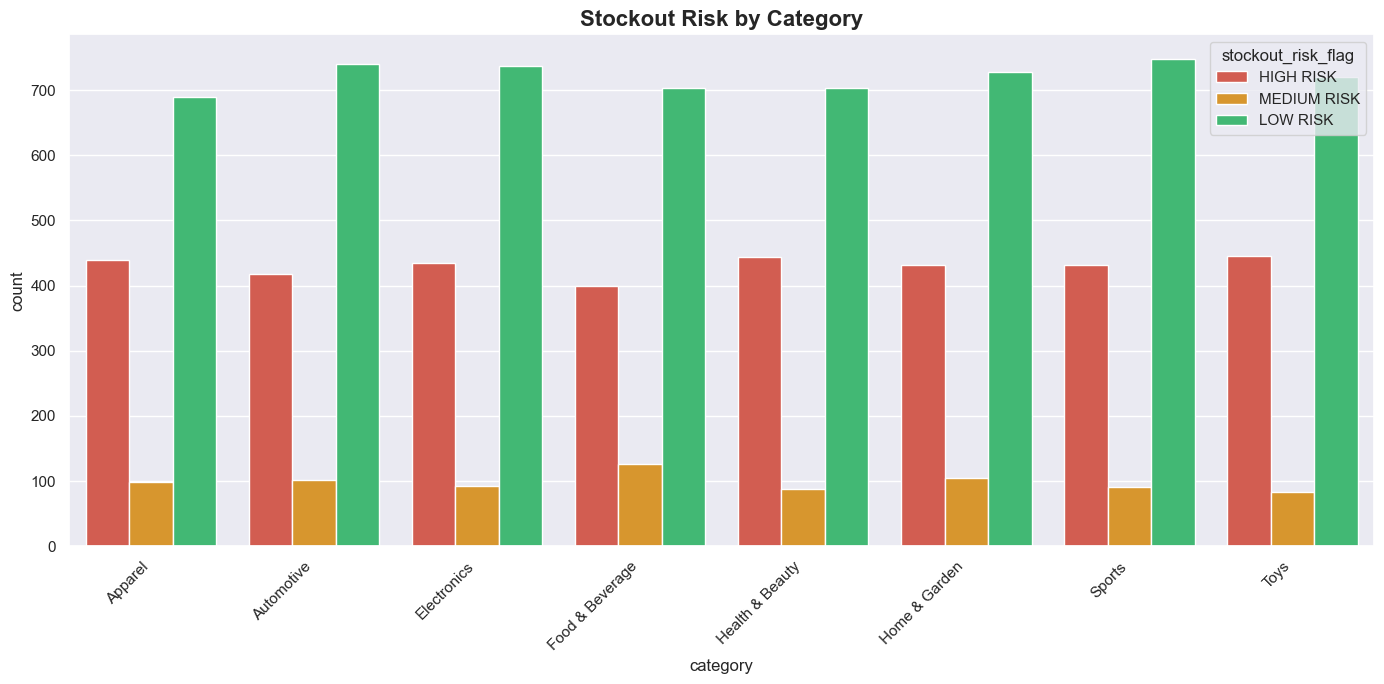

In [4]:
colors = {"HIGH RISK": "#e74c3c", "MEDIUM RISK": "#f39c12", "LOW RISK": "#2ecc71"}
risk_counts = df.groupby(["category", "stockout_risk_flag"]).size().reset_index(name="count")

plt.figure(figsize=(14, 7))
sns.barplot(data=risk_counts, x="category", y="count",
            hue="stockout_risk_flag",
            hue_order=["HIGH RISK", "MEDIUM RISK", "LOW RISK"],
            palette=colors)
plt.title("Stockout Risk by Category", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("stockout_by_category.png", dpi=150)
plt.show()

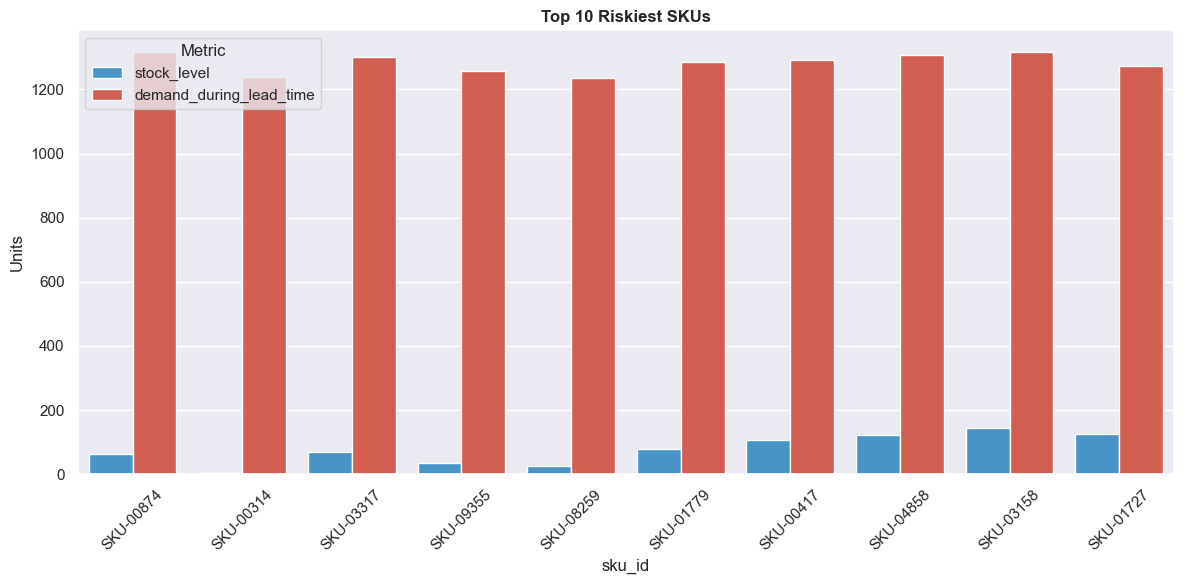

In [5]:
top10 = df.nsmallest(10, "safety_stock_buffer")[
    ["sku_id", "stock_level", "demand_during_lead_time"]
].melt(id_vars="sku_id", var_name="Metric", value_name="Units")

sns.barplot(data=top10, x="sku_id", y="Units", hue="Metric",
            palette={"stock_level": "#3498db", "demand_during_lead_time": "#e74c3c"})
plt.title("Top 10 Riskiest SKUs", fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

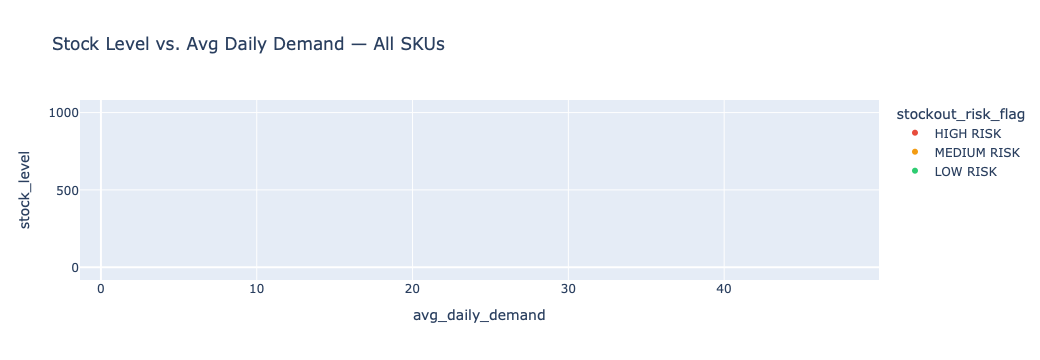

In [6]:
fig = px.scatter(df, x="avg_daily_demand", y="stock_level",
                 color="stockout_risk_flag",
                 color_discrete_map=colors,
                 hover_data=["sku_id", "category", "safety_stock_buffer"],
                 title="Stock Level vs. Avg Daily Demand — All SKUs")
fig.show()

In [7]:
total = len(df)
high  = len(df[df["stockout_risk_flag"] == "HIGH RISK"])
med   = len(df[df["stockout_risk_flag"] == "MEDIUM RISK"])
low   = len(df[df["stockout_risk_flag"] == "LOW RISK"])

print("=" * 45)
print(f"  Total SKUs   : {total:,}")
print(f"  HIGH RISK    : {high:,}  ({100*high/total:.1f}%)")
print(f"  MEDIUM RISK  : {med:,}  ({100*med/total:.1f}%)")
print(f"  LOW RISK     : {low:,}  ({100*low/total:.1f}%)")
print("=" * 45)

  Total SKUs   : 10,000
  HIGH RISK    : 3,445  (34.5%)
  MEDIUM RISK  : 786  (7.9%)
  LOW RISK     : 5,769  (57.7%)
